<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW2_JudsonLima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 2

Judson Lima

OPTI 556, Fall 2023

##Libraries

In [6]:
import numpy as np
from skimage import io
from skimage import color, data, restoration, exposure
from skimage.restoration import denoise_tv_chambolle
from skimage import color, data, restoration, exposure, filters
from skimage.util import random_noise

from scipy.signal import convolve2d, convolve
from scipy.signal import bspline
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})


##Weiner, total variation and EM algorithms



This first section uses Wiener filtering for signal esitmation. Assuming that the expected value of the signal to noise ratio is uniform and independent of frequency, in which case the Wiener filter is

$$
w(u)=\frac{{\hat h}^\ast (u) {\rm SNR}}{|{\hat h} (u)|^2 {\rm SNR} +1}
$$

In [59]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/Jeeps.jpg

--2023-09-19 09:06:42--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/Jeeps.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9421858 (9.0M) [application/octet-stream]
Saving to: ‘Jeeps.jpg.2’

Jeeps.jpg.2         100%[===================>]   8.99M  --.-KB/s    in 0.1s    

2023-09-19 09:06:42 (83.0 MB/s) - ‘Jeeps.jpg.2’ saved [9421858/9421858]



In [60]:
Jeep = io.imread('Jeeps.jpg',as_gray=True)
np.save("Jeeps.npy",Jeep)
Jeep = np.load('Jeeps.npy')
Jeep = Jeep[2500:3524,4000:5024]
Jeep=exposure.equalize_adapthist(Jeep)
plt.imshow(Jeep,cmap='gray')

KeyboardInterrupt: ignored

##SNR levels differences

Different Noise levels for Gaussian blur.

In [ ]:
# convolve with sampling psf
snr=10
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same')
#add noise
Jeep_blured += Jeep.std() * np.random.standard_normal(Jeep.shape)/snr

deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

sigma = .5
Jeep_noise = random_noise(Jeep, var=sigma**2)
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 10, Gaussian Blur 10 pixel std')
ax[0,0].imshow(Jeep)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured)
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')



In [ ]:
# convolve with sampling psf
snr=100
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same')
#add noise
Jeep_blured += Jeep.std() * np.random.standard_normal(Jeep.shape)/snr

deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

sigma = .5
Jeep_noise = random_noise(Jeep, var=sigma**2)
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 100, Gaussian Blur 10 pixel std / ')
ax[0,0].imshow(Jeep)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured)
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')



<ipython-input-70-169e3696bd48>:12: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


Text(0.5, 1.0, 'TV Restored (Noise restored)')

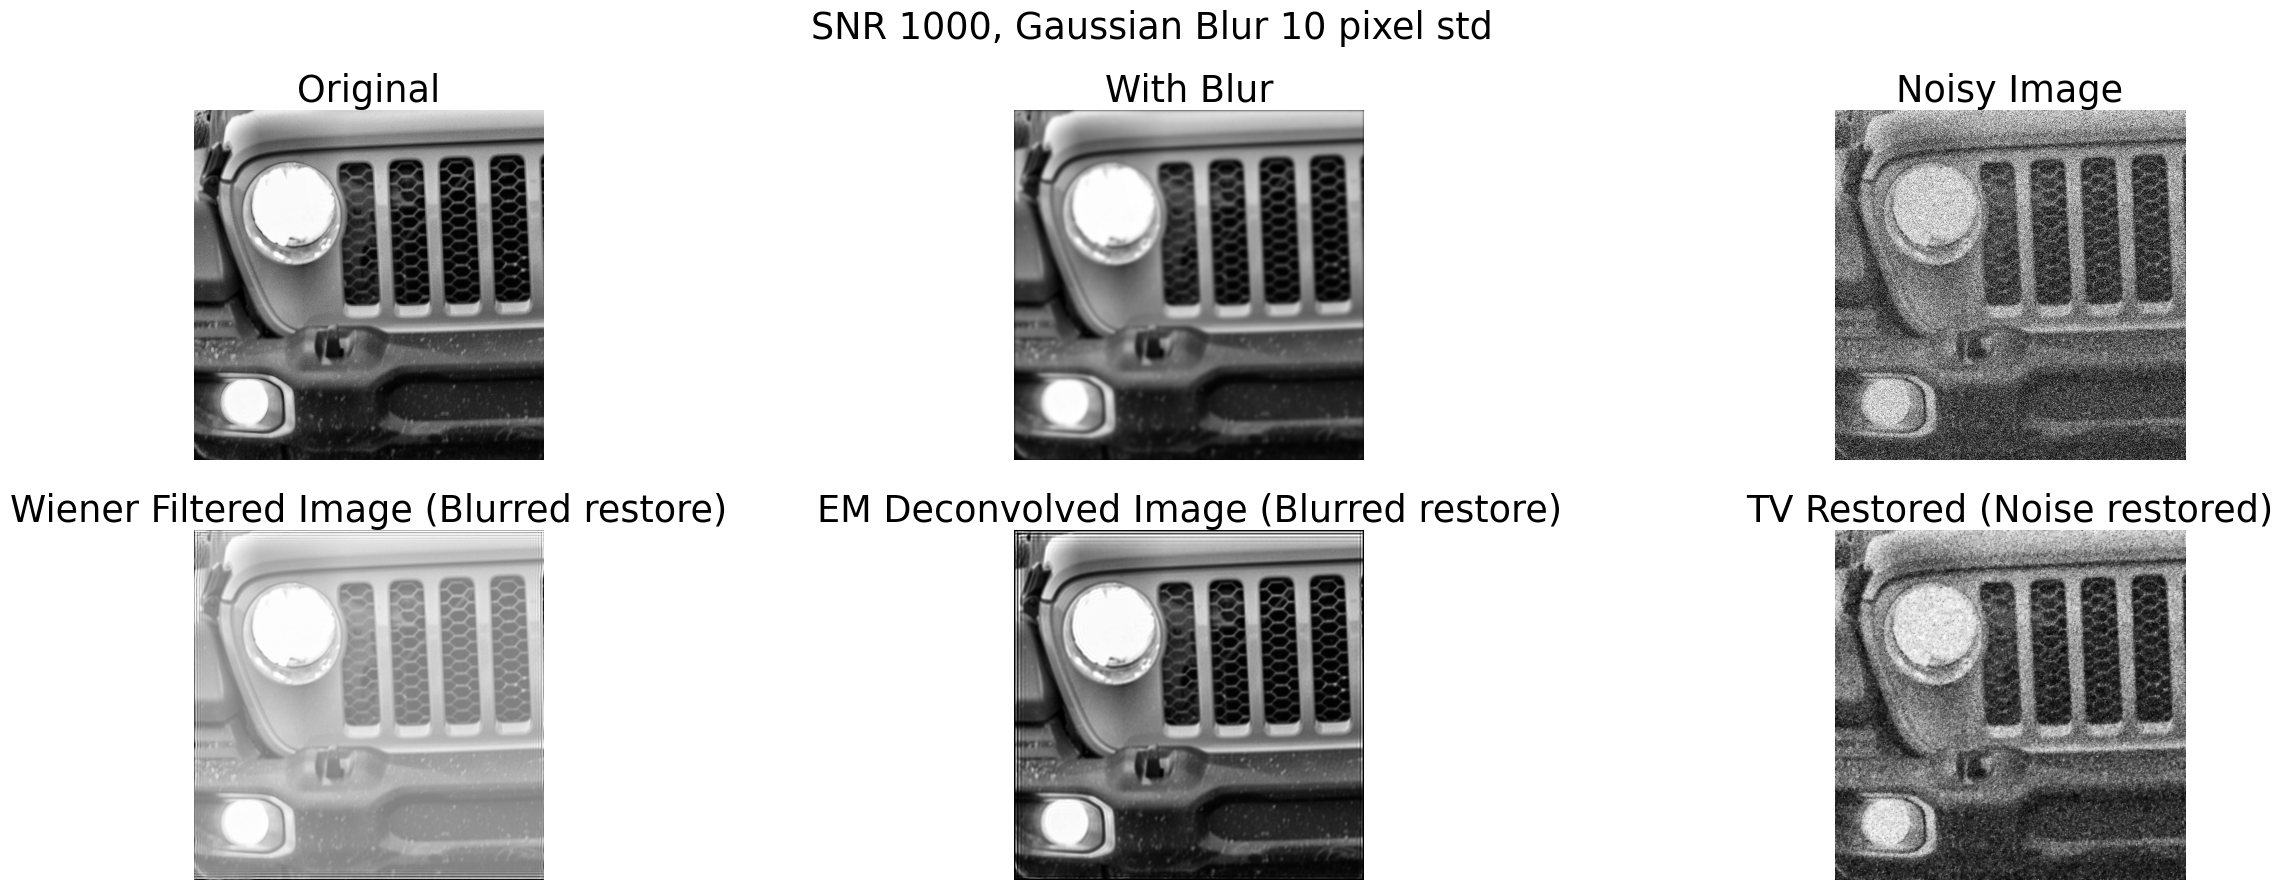

In [70]:
# convolve with sampling psf
snr=1000
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same')
#add noise
Jeep_blured += Jeep.std() * np.random.standard_normal(Jeep.shape)/snr

deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

sigma = .5
Jeep_noise = random_noise(Jeep, var=sigma**2)
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 1000, Gaussian Blur 10 pixel std')
ax[0,0].imshow(Jeep)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured)
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')


In [ ]:
plt.imshow(psf)

##Different blur widths for same SNR

This section also includes the 100 and 1000 noise comparison of poisson for the TV images.

In [ ]:
# convolve with sampling psf
snr=100
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same')
#add noise
Jeep_blured += Jeep.std() * np.random.standard_normal(Jeep.shape)/snr

deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

sigma = .5
Jeep_noise = random_noise(Jeep, var=sigma**2)
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 100, Gaussian Blur 5 pixel std / 100 photons per pixel')
ax[0,0].imshow(Jeep)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured)
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')



In [ ]:
plt.imshow(psf)

In [ ]:
# convolve with sampling psf
snr=100
xrange=np.linspace(-3,3,64)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same')
#add noise
Jeep_blured += Jeep.std() * np.random.standard_normal(Jeep.shape)/snr

deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

sigma = .05
Jeep_noise = random_noise(Jeep, var=sigma**2)
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 100, Gaussian Blur 5 pixel std / 100 photons per pixel')
ax[0,0].imshow(Jeep, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')



In [ ]:
plt.imshow(psf)

##Poisson Noise

Created "detector" structure for poisson noise. Then added conditions for photons per pixel to be mapped out to it.

In [63]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr


p=31
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;



(-0.5, 1023.5, 1023.5, -0.5)

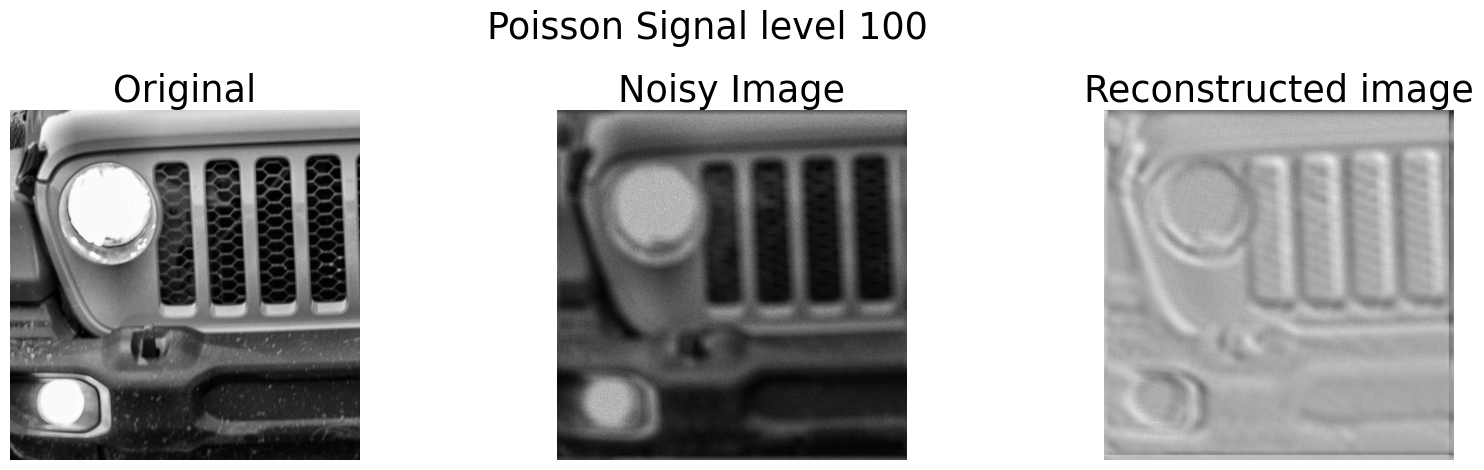

In [73]:

# Step 1 generate projected pattern
Jeep_blured = convolve2d(Jeep,t, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
Jeep_blured = np.random.poisson(photonsPerPixel*Jeep_blured/np.max(Jeep_blured))

plt.suptitle('Poisson Signal level 100')
plt.subplot(2,3,1);
plt.imshow(Jeep,cmap='gray')
plt.title('Original');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(Jeep_blured,cmap='gray')
plt.title('Noisy Image');
plt.axis('off')
plt.subplot(2,3,3);
Jeep_noise = convolve2d(Jeep_blured,ht, mode='same',boundary='wrap');
plt.imshow(Jeep_noise, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')




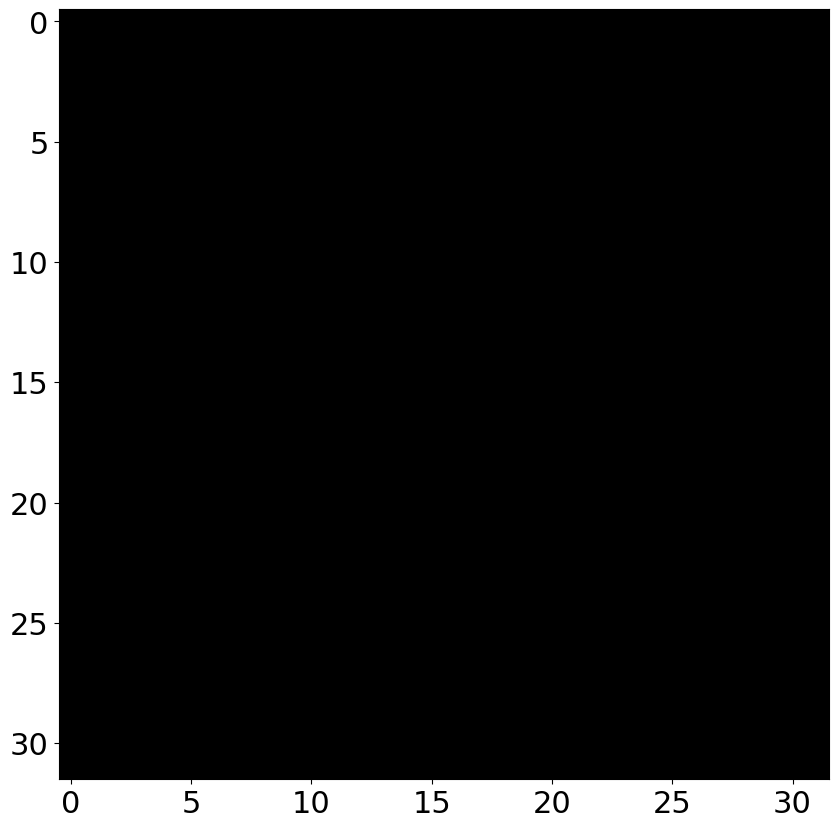

In [35]:
 xest = Jeep_noise


def mse_loss(xest,y):
    error = abs(xest)**2 + abs(y)**2-2*np.abs(np.conjugate(xest)*y)
    return np.mean(error)

# measurement
for pip in range(2):
  measurement = get_measurement(im,photons = 100**(pip+1),is_noisy = True ,is_energy_constraint = False)

# Check energy
#print("Energy before / after:",np.sum(im**2),np.sum(measurement**2))

# reconstruction
  estimate = reconstruction(measurement,is_energy_constraint = False)
  rotation=np.conjugate(estimate)*im/(np.abs(estimate)*np.abs(im))
  plt.subplot(1,3,pip+1)
  plt.imshow(np.real(rotation*estimate),cmap='gray')
  plt.title(np.str(10**(pip+1))+' photons; PSNR='+np.str(10*np.log10(1/mse_loss(estimate,im))))
  plt.axis('off')
plt.savefig('fpRecon.pdf')
files.download('fpRecon.pdf')

<ipython-input-39-d21d6c266383>:16: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


Text(0.5, 1.0, 'TV Restored (Noise restored)')

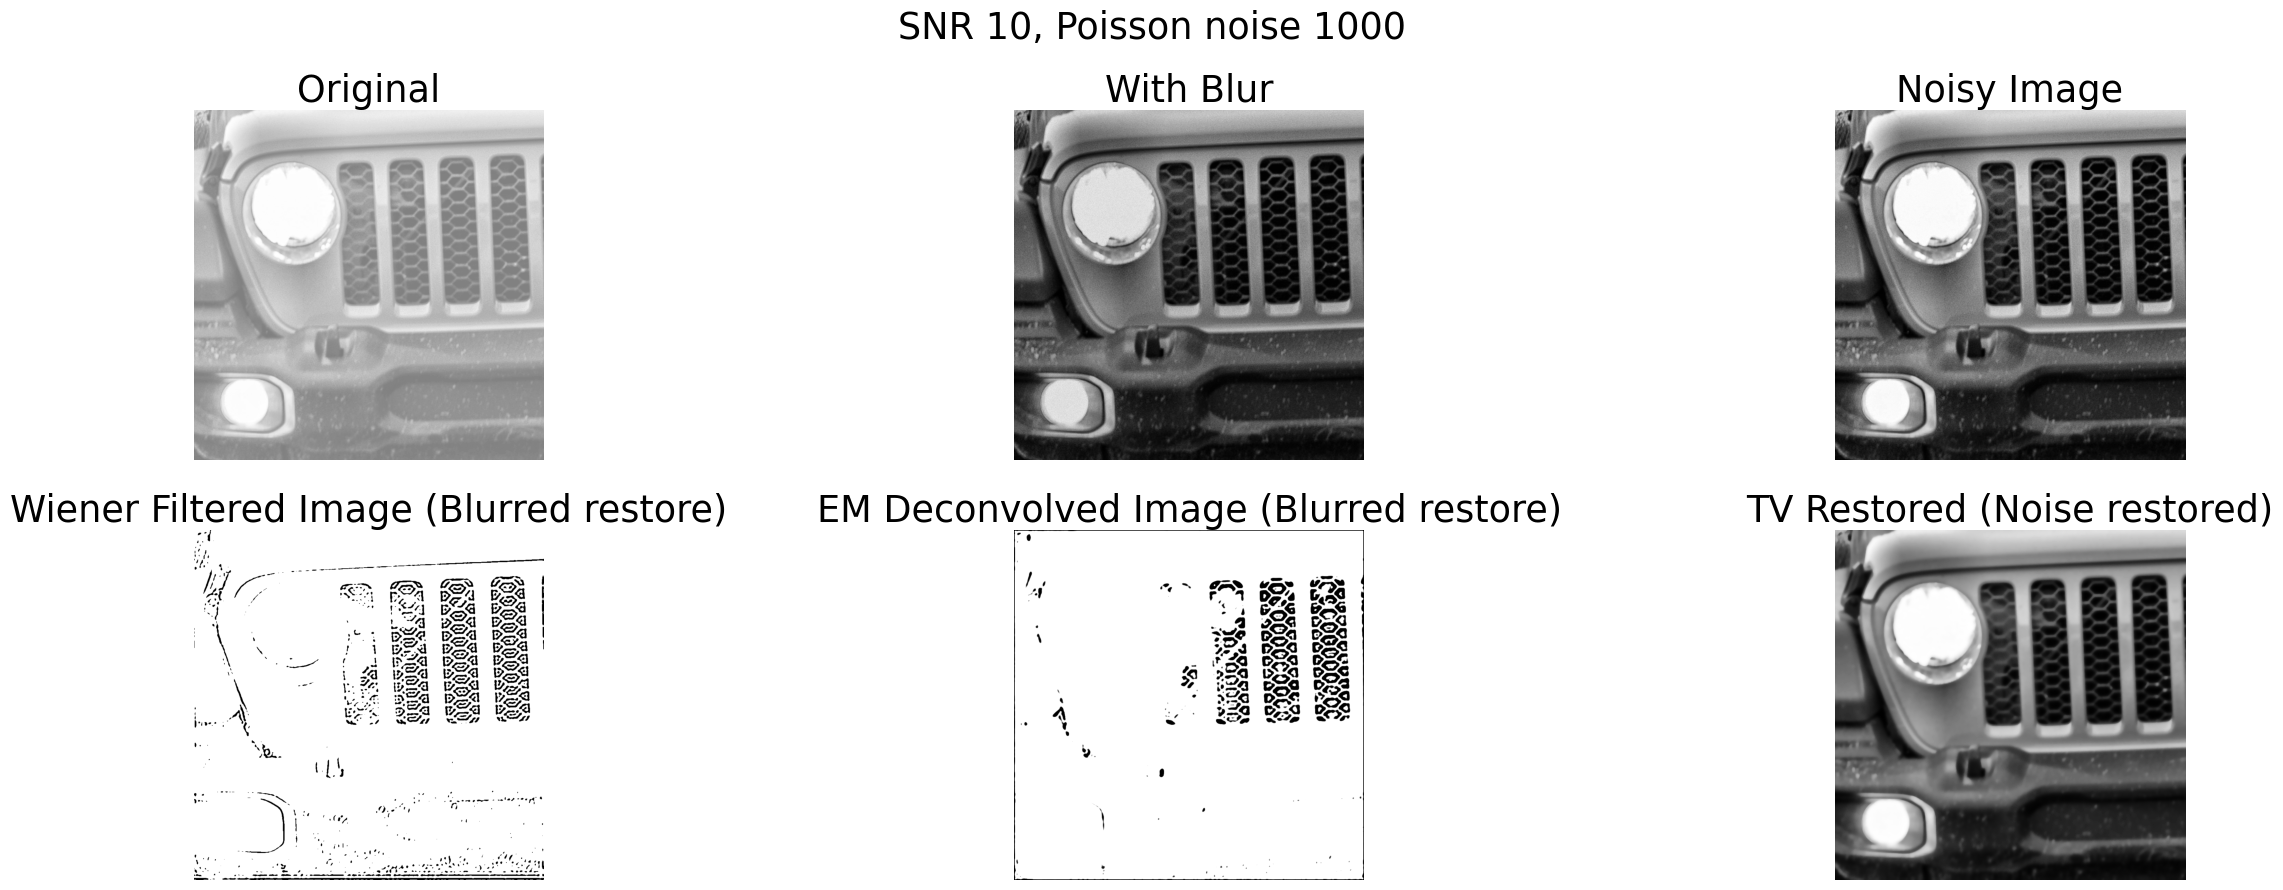

In [39]:
# convolve with sampling psf
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))

psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(Jeep, psf, 'same','wrap')


#add noise poisson
photonsPerPixel=1000
Jeep_blured=np.random.poisson(photonsPerPixel*Jeep/np.max(Jeep))


deconvolved = restoration.wiener(Jeep_blured, psf,1/snr)
deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

Jeep_noise = random_noise(Jeep, mode='Poisson')
denoised = denoise_tv_chambolle(Jeep_noise, weight=0.2)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
plt.suptitle('SNR 10, Poisson noise 1000')
ax[0,0].imshow(Jeep, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(Jeep_blured)
ax[0,1].axis('off')
ax[0,1].set_title('With Blur')
ax[0,2].imshow(Jeep_noise)
ax[0,2].axis('off')
ax[0,2].set_title('Noisy Image')

ax[1,0].imshow(deconvolved)
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image (Blurred restore)')
ax[1,1].imshow(deconvolvedRL)
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image (Blurred restore)')
ax[1,2].imshow(denoised)
ax[1,2].axis('off')
ax[1,2].set_title('TV Restored (Noise restored)')

#plt.savefig('JeepSNR10PN1000.pdf')